In [1]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [3]:
#Importing trianiing and testing dataset

df_train=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:

#Printing the rows & columns of the dataset

print("The no. of Rows in dataset is: ",df_train.shape[0],"and no. of columns is ",df_train.shape[1])

The no. of Rows in dataset is:  159571 and no. of columns is  8


In [5]:
#Printing the information about the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:

#Printing the description of the train dataset

df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:

#Droping unnecessary column

df_train.drop("id",axis=1,inplace=True)

<AxesSubplot:xlabel='malignant', ylabel='count'>

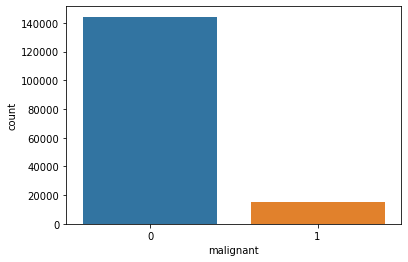

In [8]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["malignant"])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

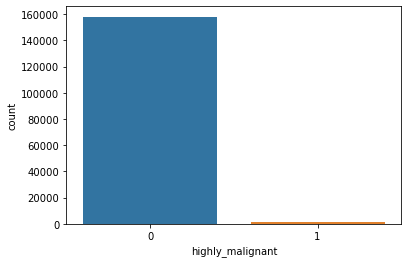

In [9]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["highly_malignant"])

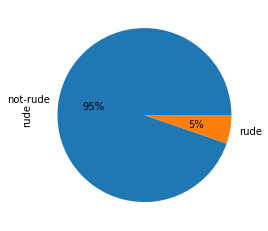

In [10]:
#We see very low prpobabliy of comment being malignant

df_train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

<AxesSubplot:xlabel='threat', ylabel='count'>

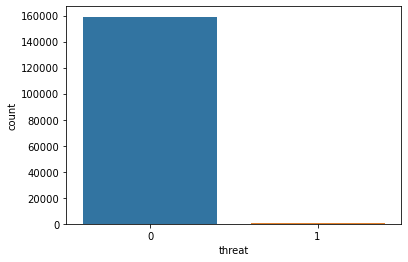

In [11]:

#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["threat"])

<AxesSubplot:xlabel='abuse', ylabel='count'>

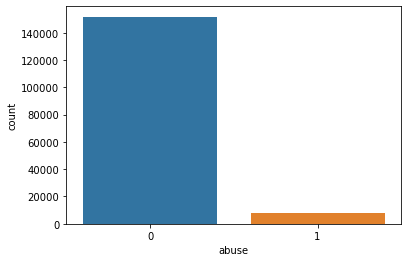

In [12]:
#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["abuse"])

<AxesSubplot:xlabel='loathe', ylabel='count'>

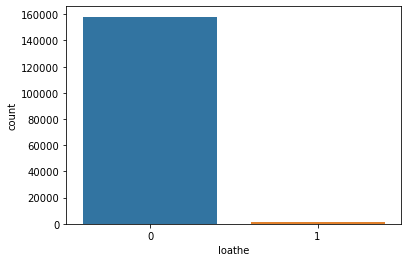

In [13]:

#We see very low prpobabliy of comment being malignant

sns.countplot(df_train["loathe"])

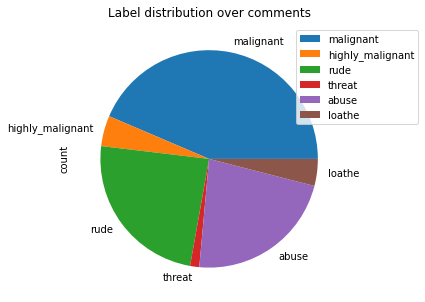

In [14]:

#Checking how which comment fall under which category

cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

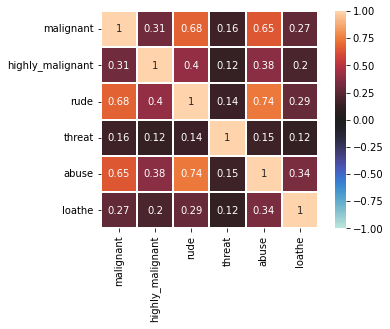

In [15]:

#Printing the correlation through the heatmap of the train dataset

sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

In [16]:
#Checking length of document

df_train["original_len"] = df_train["comment_text"].str.len() 

In [17]:

#Converting all letter to lower case

df_train["comment_text"] = df_train["comment_text"].str.lower()

In [18]:
#Replacing with email address
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#Replacing with web address                                                 
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#Replacing with number
df_train["comment_text"]= df_train["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#Remove  punctation
df_train["comment_text"]=df_train["comment_text"].str.replace(r'[^\w\d\s]'," ")

#Replace extra space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+'," ")

#Replacing leadning and trailing white space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$', "")

#Removing \n
df_train["comment_text"]=df_train["comment_text"].str.replace("\n"," ")


#Remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_train["comment_text"]= df_train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#Such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(word) for word in x.split()))

In [19]:
#Checking clean length

df_train["clean_len"] = df_train["comment_text"].str.len() 

In [20]:
#Printing the first five rows of the datset

df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,match background colour seemingly stuck thanks...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page number nu...,0,0,0,0,0,0,99,50
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,56


In [21]:
#Making one target column 

df_train["label"]=df_train["malignant"] | df_train["highly_malignant"] | df_train["rude"] | df_train["threat"] | df_train["abuse"] | df_train["loathe"]

In [22]:
#Printing the original length & cleaned length

print('original length',df_train.original_len.sum())
print('cleaned length',df_train.clean_len.sum())

original length 62893130
cleaned length 40149092


In [23]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nirav\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.2.2          |   py39hb82d6ee_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py39hb82d6ee_0

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.14.0-py39hcbf5309_0




wo



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda




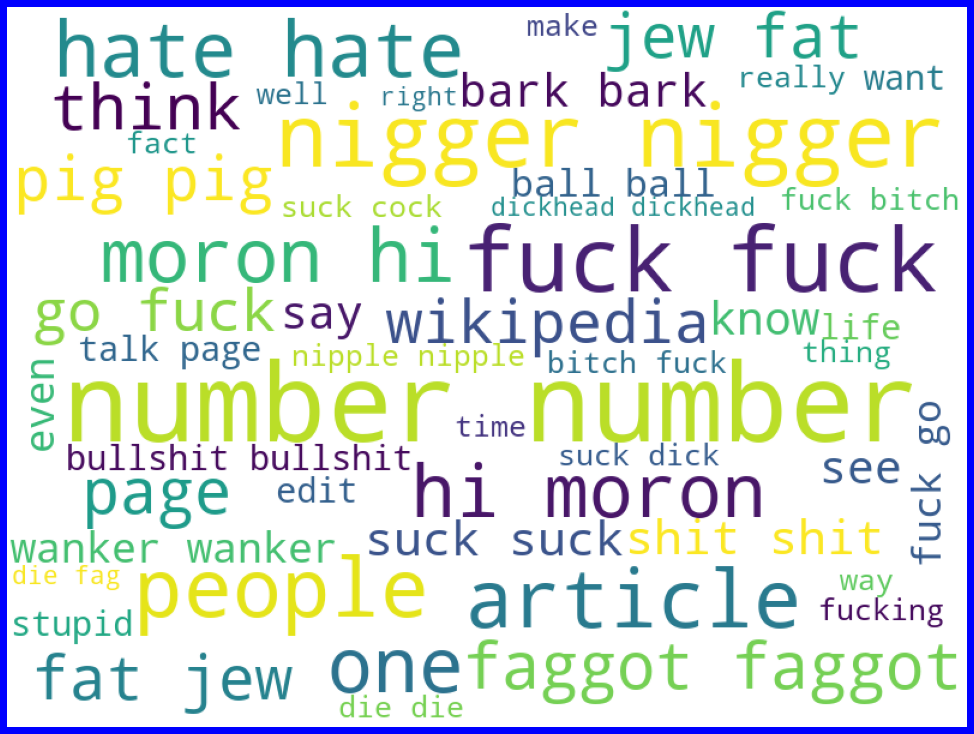

In [24]:
#Seeing the word which are offensive

from wordcloud import WordCloud
!pip install wordcloud

malignant=df_train["comment_text"][df_train["label"]==1]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

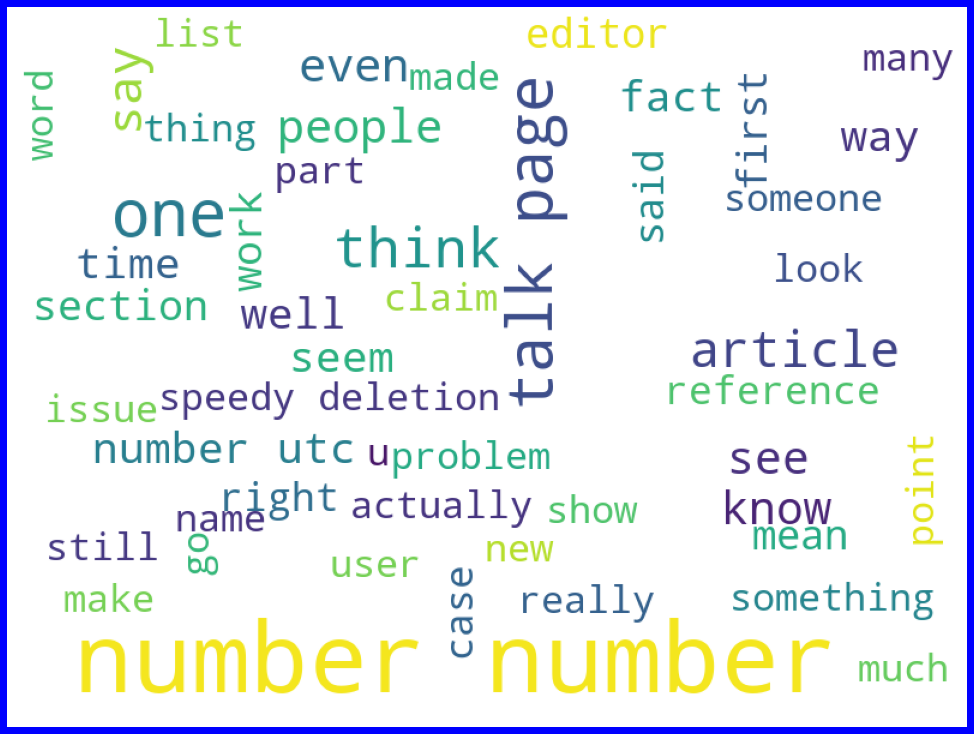

In [25]:
#Seeing the word which are not offensive

from wordcloud import WordCloud

non_malignant=df_train["comment_text"][df_train["label"]==0]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(non_malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
#Printing the first five rows of the test dataset

df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [27]:

#Printing the rows & the columns of the test dataset

print("The no. of Rows in dataset is: ",df_test.shape[0],"and no. of columns is ",df_test.shape[1])

The no. of Rows in dataset is:  153164 and no. of columns is  2


In [28]:

#Dropping the column id as it do not contribute towards the analysis part

df_test.drop("id",axis=1,inplace=True)

In [29]:

#Converting the text to the lower

df_test["comment_text"] = df_test["comment_text"].str.lower()

In [30]:
#Storing the length to the new column to original len

df_test["original_len"] = df_test["comment_text"].str.len() 

In [31]:

#Printing the first five rows of test dataset

df_test.head()

,comment_text,original_len
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41


In [32]:
#Replacing with email address
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#Replacing with web address                                                   
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#Replacing with number
df_test["comment_text"]= df_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#Remove  punctation
df_test["comment_text"]=df_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

#Replace extra space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+'," ")

#Replacing leading and trailing white space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

#Replacing with\n
df_test["comment_text"]=df_test["comment_text"].str.replace("\n"," ")

#Remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_test["comment_text"]= df_test["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(word) for word in x.split()))

In [33]:
#Storing the length to the clean length new column

df_test["clean_len"] = df_test["comment_text"].str.len() 

In [34]:
#Printing the first five rows of the test dataset

df_test.head()

,comment_text,original_len,clean_len
0,yo bitch rule succesful ever whats hating sad ...,367,221
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [35]:
#Printing the original length & the cleaned length of the test dataset

print('original length',df_test.original_len.sum())
print('cleaned length',df_test.clean_len.sum())

original length 55886104
cleaned length 35617170


In [36]:
#Importing all the classifiers which will help us for further analysis

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [37]:
#Using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value

tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [38]:
#Sending the data for training & testing

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)

In [39]:
#Fitting & predicting the model

lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

In [40]:
#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [41]:
#Printing the accuracy score , cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9561326548517284 
 cross validation score : 0.9541646025444619 
 logloss: 1.5151277924313036


In [42]:
#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

array([[35689,   168],
       [ 1582,  2454]], dtype=int64)

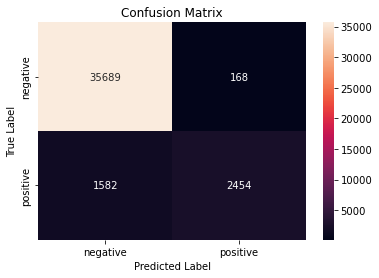

In [43]:
#Printing the graph of confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
#Creating empty lists & appending 

accuracy = []
cross_val = []
diff = []
logloss=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [45]:
#Fitting & predicting the model

dt= AdaBoostClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [46]:

#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     35857
           1       0.88      0.55      0.68      4036

    accuracy                           0.95     39893
   macro avg       0.91      0.77      0.82     39893
weighted avg       0.94      0.95      0.94     39893



In [47]:

#Printing the accuracy score cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.946782643571554 
 cross validation score : 0.9471207218179667 
 logloss: 1.8380687278164287


In [48]:
#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

array([[35540,   317],
       [ 1806,  2230]], dtype=int64)

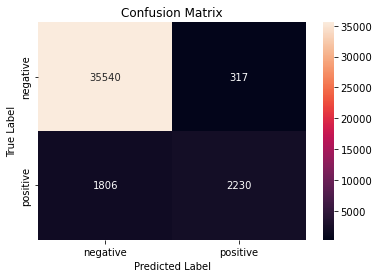

In [49]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
#Appending the data

accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [51]:
#Fitting & predicting the model

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [52]:

#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     35857
           1       0.51      0.17      0.26      4036

    accuracy                           0.90     39893
   macro avg       0.71      0.58      0.60     39893
weighted avg       0.87      0.90      0.88     39893



In [53]:

#Printing the accuracy score cross validation & logloss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.899832050735718 
 cross validation score : 0.8880873367931708 
 logloss: 3.459691510058969


In [54]:

#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

array([[35203,   654],
       [ 3342,   694]], dtype=int64)

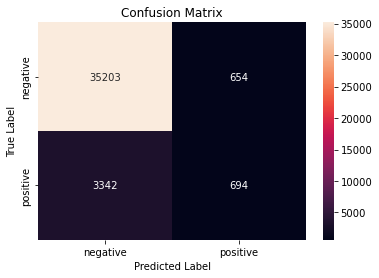

In [55]:

conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:

#Appending the data

accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [57]:
#Fitting & predicting the model

ad= MultinomialNB()
ad.fit(x_train,y_train)

y_pred=ad.predict(x_test)

In [58]:
#Printing the classification report

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35857
           1       0.99      0.20      0.34      4036

    accuracy                           0.92     39893
   macro avg       0.95      0.60      0.65     39893
weighted avg       0.93      0.92      0.89     39893



In [59]:

#Printing the accuracy score cross validation & log loss

a=accuracy_score(y_test,y_pred)
c=cross_val_score(ad,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9193091519815506 
 cross validation score : 0.9169397954074388 
 logloss: 2.786963337216915


In [60]:
#Printing the confusion matrix

confusion_matrix(y_test,y_pred)

array([[35848,     9],
       [ 3210,   826]], dtype=int64)

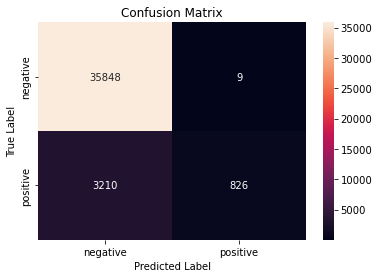

In [61]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
#Appending the data

accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [63]:

#Creating the lists of the models

model = ["LogisticRegression","AdaBoostClassifier","KNeighborsClassifier","MultinomialNB"]

In [64]:

#Making a dataframe of the classifier & printing the classifier

classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

,MODEL,Accuracy score,Cross_validation_Score,Difference,Logloss
0,LogisticRegression,0.956133,0.954165,0.001968,1.515128
1,AdaBoostClassifier,0.946783,0.947121,-0.000338,1.838069
2,KNeighborsClassifier,0.899832,0.888087,0.011745,3.459692
3,MultinomialNB,0.919309,0.916940,0.002369,2.786963


In [65]:
#Hyperparameter tunning the model

from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [66]:

#Passing the parameters

rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)

In [67]:
#Fitting the model

rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [68]:

#Printing the best parameters

rand_search.best_params_

{'warm_start': True, 'random_state': 70, 'dual': False}

In [69]:
#Fitting & predicting the model

lr= LogisticRegression(warm_start=False,random_state=100,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)

In [70]:
#Printing the accuracy score cross validation classification report & confusion matrix of the model

print(" Accuracy score :",accuracy_score(y_test,y_pred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(lr,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9561326548517284 
 Cross_validation_Score : 0.9541646025444619 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893
 Confusion matrix :
 [[35689   168]
 [ 1582  2454]]


In [71]:

#Logloss

log_loss(y_test,y_pred1)

1.5151277924313036

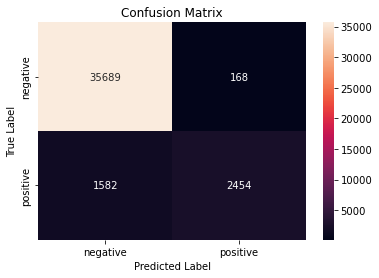

In [72]:

conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
#Importing auc roc curve

from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

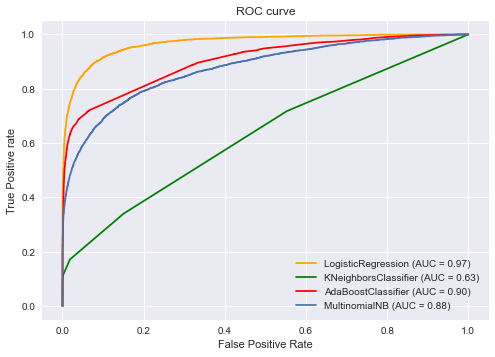

In [74]:
#Plotting the curve

plt.style.use('seaborn')

disp = plot_roc_curve(lr,x_test,y_test,color='orange')
plot_roc_curve(knn,x_test,y_test,color='green',ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,color='red',ax=disp.ax_)
plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

In [75]:

#Importing pickle to save the model

import pickle
pickle.dump(lr,open("MALIGSNT_COMMENTS.pk1","wb"))

In [76]:
#Loading the model

load_model = pickle.load(open("MALIGSNT_COMMENTS.pk1","rb"))

In [77]:

#Storing the comment_text column into testing data

testing_data = tf.transform(df_test["comment_text"])

In [78]:

#Predicting the testing data

a=lr.predict(testing_data)

In [79]:
#Creaing the dataframe

pd.DataFrame(a)

,0
0,1
1,0
2,0
3,0
4,0
...,...
153159,1
153160,0
153161,0
153162,0


In [80]:
#Storing a to the label column

df_test["label"]=a

In [81]:

#Printing df_test

df_test

,comment_text,original_len,clean_len,label
0,yo bitch rule succesful ever whats hating sad ...,367,221,1
1,rfc title fine imo,50,18,0
2,source zawe ashton lapland,54,26,0
3,look back source information updated correct f...,205,109,0
4,anonymously edit article,41,24,0
...,...,...,...,...
153159,totally agree stuff nothing long crap,60,37,1
153160,throw field home plate get faster throwing cut...,198,107,0
153161,okinotorishima category see change agree corre...,423,238,0
153162,one founding nation eu germany law return quit...,502,319,0


In [82]:

#Storing the test data differently

df_test.to_csv("MALIGANT-FINAL-TEST.csv")